<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/Trash_CNN_dez_12_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import tensorflow as tf

%matplotlib inline

In [0]:
# http://ftp.feq.ufu.br/ubirajara/
# https://www.noip.com/support/knowledgebase/setting-up-a-ftp-server-on-your-home-computer/

In [44]:
!wget http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip
!ls -l trash_nov_22_2018.zip


--2018-12-12 03:28:43--  http://ftp.feq.ufu.br/ubirajara/trash_nov_22_2018.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42806842 (41M) [application/zip]
Saving to: ‘trash_nov_22_2018.zip.1’

trash_nov_22_2018.z 100%[===================>]  40.82M  11.2MB/s    in 4.8s    

2018-12-12 03:28:48 (8.53 MB/s) - ‘trash_nov_22_2018.zip.1’ saved [42806842/42806842]

-rw-r--r-- 1 root root 42806842 Nov 22 14:54 trash_nov_22_2018.zip


In [45]:
!ls

cardboard100.jpg  glass308.jpg	metal57.jpg   paper92.jpg
cardboard101.jpg  glass309.jpg	metal58.jpg   paper93.jpg
cardboard102.jpg  glass30.jpg	metal59.jpg   paper94.jpg
cardboard103.jpg  glass310.jpg	metal5.jpg    paper95.jpg
cardboard104.jpg  glass311.jpg	metal60.jpg   paper96.jpg
cardboard105.jpg  glass312.jpg	metal61.jpg   paper97.jpg
cardboard106.jpg  glass313.jpg	metal62.jpg   paper98.jpg
cardboard107.jpg  glass314.jpg	metal63.jpg   paper99.jpg
cardboard108.jpg  glass315.jpg	metal64.jpg   paper9.jpg
cardboard109.jpg  glass316.jpg	metal65.jpg   plastic100.jpg
cardboard10.jpg   glass317.jpg	metal66.jpg   plastic101.jpg
cardboard110.jpg  glass318.jpg	metal67.jpg   plastic102.jpg
cardboard111.jpg  glass319.jpg	metal68.jpg   plastic103.jpg
cardboard112.jpg  glass31.jpg	metal69.jpg   plastic104.jpg
cardboard113.jpg  glass320.jpg	metal6.jpg    plastic105.jpg
cardboard114.jpg  glass321.jpg	metal70.jpg   plastic106.jpg
cardboard115.jpg  glass322.jpg	metal71.jpg   plastic107.jpg
cardboard1

In [46]:
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
/content



In [0]:
import glob
img_dir = "/content" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [0]:
import zipfile
file_name = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
file_name.extractall() 


In [49]:
!ls

cardboard100.jpg  glass308.jpg	metal57.jpg   paper92.jpg
cardboard101.jpg  glass309.jpg	metal58.jpg   paper93.jpg
cardboard102.jpg  glass30.jpg	metal59.jpg   paper94.jpg
cardboard103.jpg  glass310.jpg	metal5.jpg    paper95.jpg
cardboard104.jpg  glass311.jpg	metal60.jpg   paper96.jpg
cardboard105.jpg  glass312.jpg	metal61.jpg   paper97.jpg
cardboard106.jpg  glass313.jpg	metal62.jpg   paper98.jpg
cardboard107.jpg  glass314.jpg	metal63.jpg   paper99.jpg
cardboard108.jpg  glass315.jpg	metal64.jpg   paper9.jpg
cardboard109.jpg  glass316.jpg	metal65.jpg   plastic100.jpg
cardboard10.jpg   glass317.jpg	metal66.jpg   plastic101.jpg
cardboard110.jpg  glass318.jpg	metal67.jpg   plastic102.jpg
cardboard111.jpg  glass319.jpg	metal68.jpg   plastic103.jpg
cardboard112.jpg  glass31.jpg	metal69.jpg   plastic104.jpg
cardboard113.jpg  glass320.jpg	metal6.jpg    plastic105.jpg
cardboard114.jpg  glass321.jpg	metal70.jpg   plastic106.jpg
cardboard115.jpg  glass322.jpg	metal71.jpg   plastic107.jpg
cardboard1

In [50]:
FILE='trash_nov_22_2018.zip'
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
print(img_name)


['cardboard1.jpg', 'cardboard2.jpg', 'cardboard3.jpg', 'cardboard4.jpg', 'cardboard5.jpg', 'cardboard6.jpg', 'cardboard7.jpg', 'cardboard8.jpg', 'cardboard9.jpg', 'cardboard10.jpg', 'cardboard11.jpg', 'cardboard12.jpg', 'cardboard13.jpg', 'cardboard14.jpg', 'cardboard15.jpg', 'cardboard16.jpg', 'cardboard17.jpg', 'cardboard18.jpg', 'cardboard19.jpg', 'cardboard20.jpg', 'cardboard21.jpg', 'cardboard22.jpg', 'cardboard23.jpg', 'cardboard24.jpg', 'cardboard25.jpg', 'cardboard26.jpg', 'cardboard27.jpg', 'cardboard28.jpg', 'cardboard29.jpg', 'cardboard30.jpg', 'cardboard31.jpg', 'cardboard32.jpg', 'cardboard33.jpg', 'cardboard34.jpg', 'cardboard35.jpg', 'cardboard36.jpg', 'cardboard37.jpg', 'cardboard38.jpg', 'cardboard39.jpg', 'cardboard40.jpg', 'cardboard41.jpg', 'cardboard42.jpg', 'cardboard43.jpg', 'cardboard44.jpg', 'cardboard45.jpg', 'cardboard46.jpg', 'cardboard47.jpg', 'cardboard48.jpg', 'cardboard49.jpg', 'cardboard50.jpg', 'cardboard51.jpg', 'cardboard52.jpg', 'cardboard53.jpg', '

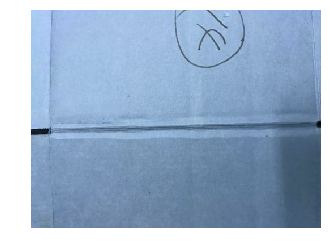

In [51]:
img=cv2.imread(img_name[0])
plt.axis("off")
plt.imshow(img)

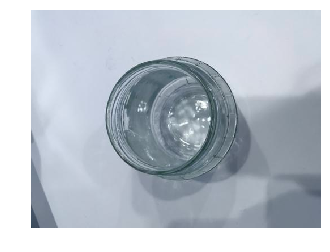

In [52]:
img=cv2.imread(img_name[800])
plt.axis("off")
plt.imshow(img)

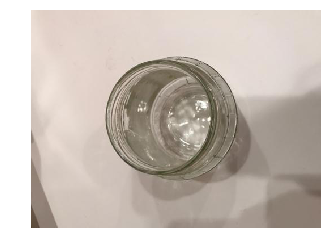

In [53]:
img=plt.imread(img_name[800])
plt.axis("off")
plt.imshow(img)

In [0]:
# 'cardboard','glass','metal','paper','plastic','trash'

paper287.jpg


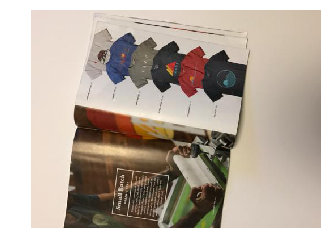

In [55]:
img=plt.imread(img_name[1600])
plt.axis("off")
plt.imshow(img)
print(img_name[1600])